A. Latar Belakang

Terdapat perusahaan yang menjual berbagai barang dan mendistribusikan penjualan dalam area asia, perusahaan tersebut ingin mengetahui analisis dari penjualan untuk barang yang memiliki keuntungan tertinggi. Jika sudah mengetahui barang yang memiliki keuntungan tertinggi perusahaan tersebut ingin menjual produk baru dan menargetkan produk baru tersebut pada daerah yang memiliki minat tinggi pada produk baru tersebut.

B. Objektif
Dari dataset tersebut berikut ini adalah beberapa objektif yang dapat dilakukan:
1. Mencari produk mana yang memiliki penjualan terbanyak
2. Menentukan daerah mana yang yang memiliki keuntungan terbanyak dari produk teratas
3. Ketika ingin menjual barang baru, jenis barang seperti apa dan daerah mana yang memiliki potensi penjualan tertinggi


C. Goals

Tujuan dari menganalisis dataset ini yaitu untuk mencari data penjualan pada region asia, sehingga dengan itu dapat melakukan rekomendasi untuk meningkatkan penjualan pada waktu berikut nya

D. penjelasan Dataset

Type	: Type of transaction made

Days for shipping (real)	: Actual shipping days of the purchased product

Days for shipment (scheduled)	: Days of scheduled delivery of the purchased product

Benefit per order	: Earnings per order placed

Sales per customer	: Total sales per customer made per customer

Delivery Status	: Delivery status of orders: Advance shipping , Late delivery ,
Shipping canceled , Shipping on time

Late_delivery_risk	: Categorical variable that indicates if sending is late (1), it is not late (0).

Category Id	: Product category code

Category Name	: Description of the product category

Customer City	: City where the customer made the purchase

Customer Country	: Country where the customer made the purchase

Customer Email	: Customer's email

Customer Fname	: Customer name

Customer Id	: Customer ID

Customer Lname	: Customer lastname

Customer Password	: Masked customer key

Customer Segment	: Types of Customers: Consumer , Corporate , Home Office

Customer State	: State to which the store where the purchase is registered belongs

Customer Street	: Street to which the store where the purchase is registered belongs

Customer Zipcode	: Customer Zipcode

Department Id	: Department code of store

Department Name	: Department name of store

Latitude	: Latitude corresponding to location of store

Longitude	: Longitude corresponding to location of store

Market	: Market to where the order is delivered : Africa , Europe , LATAM , Pacific Asia , USCA

Order City	: Destination city of the order

Order Country	: Destination country of the order

Order Customer Id	: Customer order code

order date (DateOrders)	: Date on which the order is made

Order Id	: Order code

Order Item Cardprod Id	: Product code generated through the RFID reader

Order Item Discount	: Order item discount value

Order Item Discount Rate	: Order item discount percentage

Order Item Id	: Order item code

Order Item Product Price	: Price of products without discount

Order Item Profit Ratio	: Order Item Profit Ratio

Order Item Quantity	: Number of products per order

Sales	: Value in sales

Order Item Total	: Total amount per order

Order Profit Per Order	: Order Profit Per Order

Order Region	: Region of the world where the order is delivered : Southeast
Asia ,South Asia ,Oceania ,Eastern Asia, West Asia , West of USA , US Center , West Africa, Central Africa ,North Africa ,Western Europe ,Northern , Caribbean , South America ,East Africa ,Southern Europe , East of USA ,Canada ,Southern Africa , Central Asia , Europe , Central America, Eastern Europe , South of USA

Order State	: State of the region where the order is delivered

Order Status	: Order Status : COMPLETE , PENDING , CLOSED , PENDING_PAYMENT ,
CANCELED , PROCESSING ,SUSPECTED_FRAUD ,ON_HOLD ,PAYMENT_REVIEW

Product Card Id	: Product code

Product Category Id	: Product category code

Product Description	: Product Description

Product Image	: Link of visit and purchase of the product

Product Name	: Product Name

Product Price	: Product Price

Product Status	: Status of the product stock :If it is 1 not available , 0 the product is available

Shipping date (DateOrders)	: Exact date and time of shipment

Shipping Mode	: The following shipping modes are presented : Standard Class , First Class , Second Class , Same Day

Berikut ini adalah langkah pengolahan data

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pickle
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_asia = pd.read_excel('ASIA.xlsx', sheet_name='Sheet1')
data_asia.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2018-03-02 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:42,First Class
4,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:21,First Class


In [ ]:
data_asia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31112 entries, 0 to 31111
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           31112 non-null  object 
 1   Days for shipping (real)       31112 non-null  int64  
 2   Days for shipment (scheduled)  31112 non-null  int64  
 3   Benefit per order              31112 non-null  float64
 4   Sales per customer             31112 non-null  float64
 5   Delivery Status                31112 non-null  object 
 6   Late_delivery_risk             31112 non-null  int64  
 7   Category Id                    31112 non-null  int64  
 8   Category Name                  31112 non-null  object 
 9   Customer City                  31112 non-null  object 
 10  Customer Country               31112 non-null  object 
 11  Customer Email                 31112 non-null  object 
 12  Customer Fname                 31112 non-null 

Menghapus kolom yang tidak relevan

In [ ]:
data_asia.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

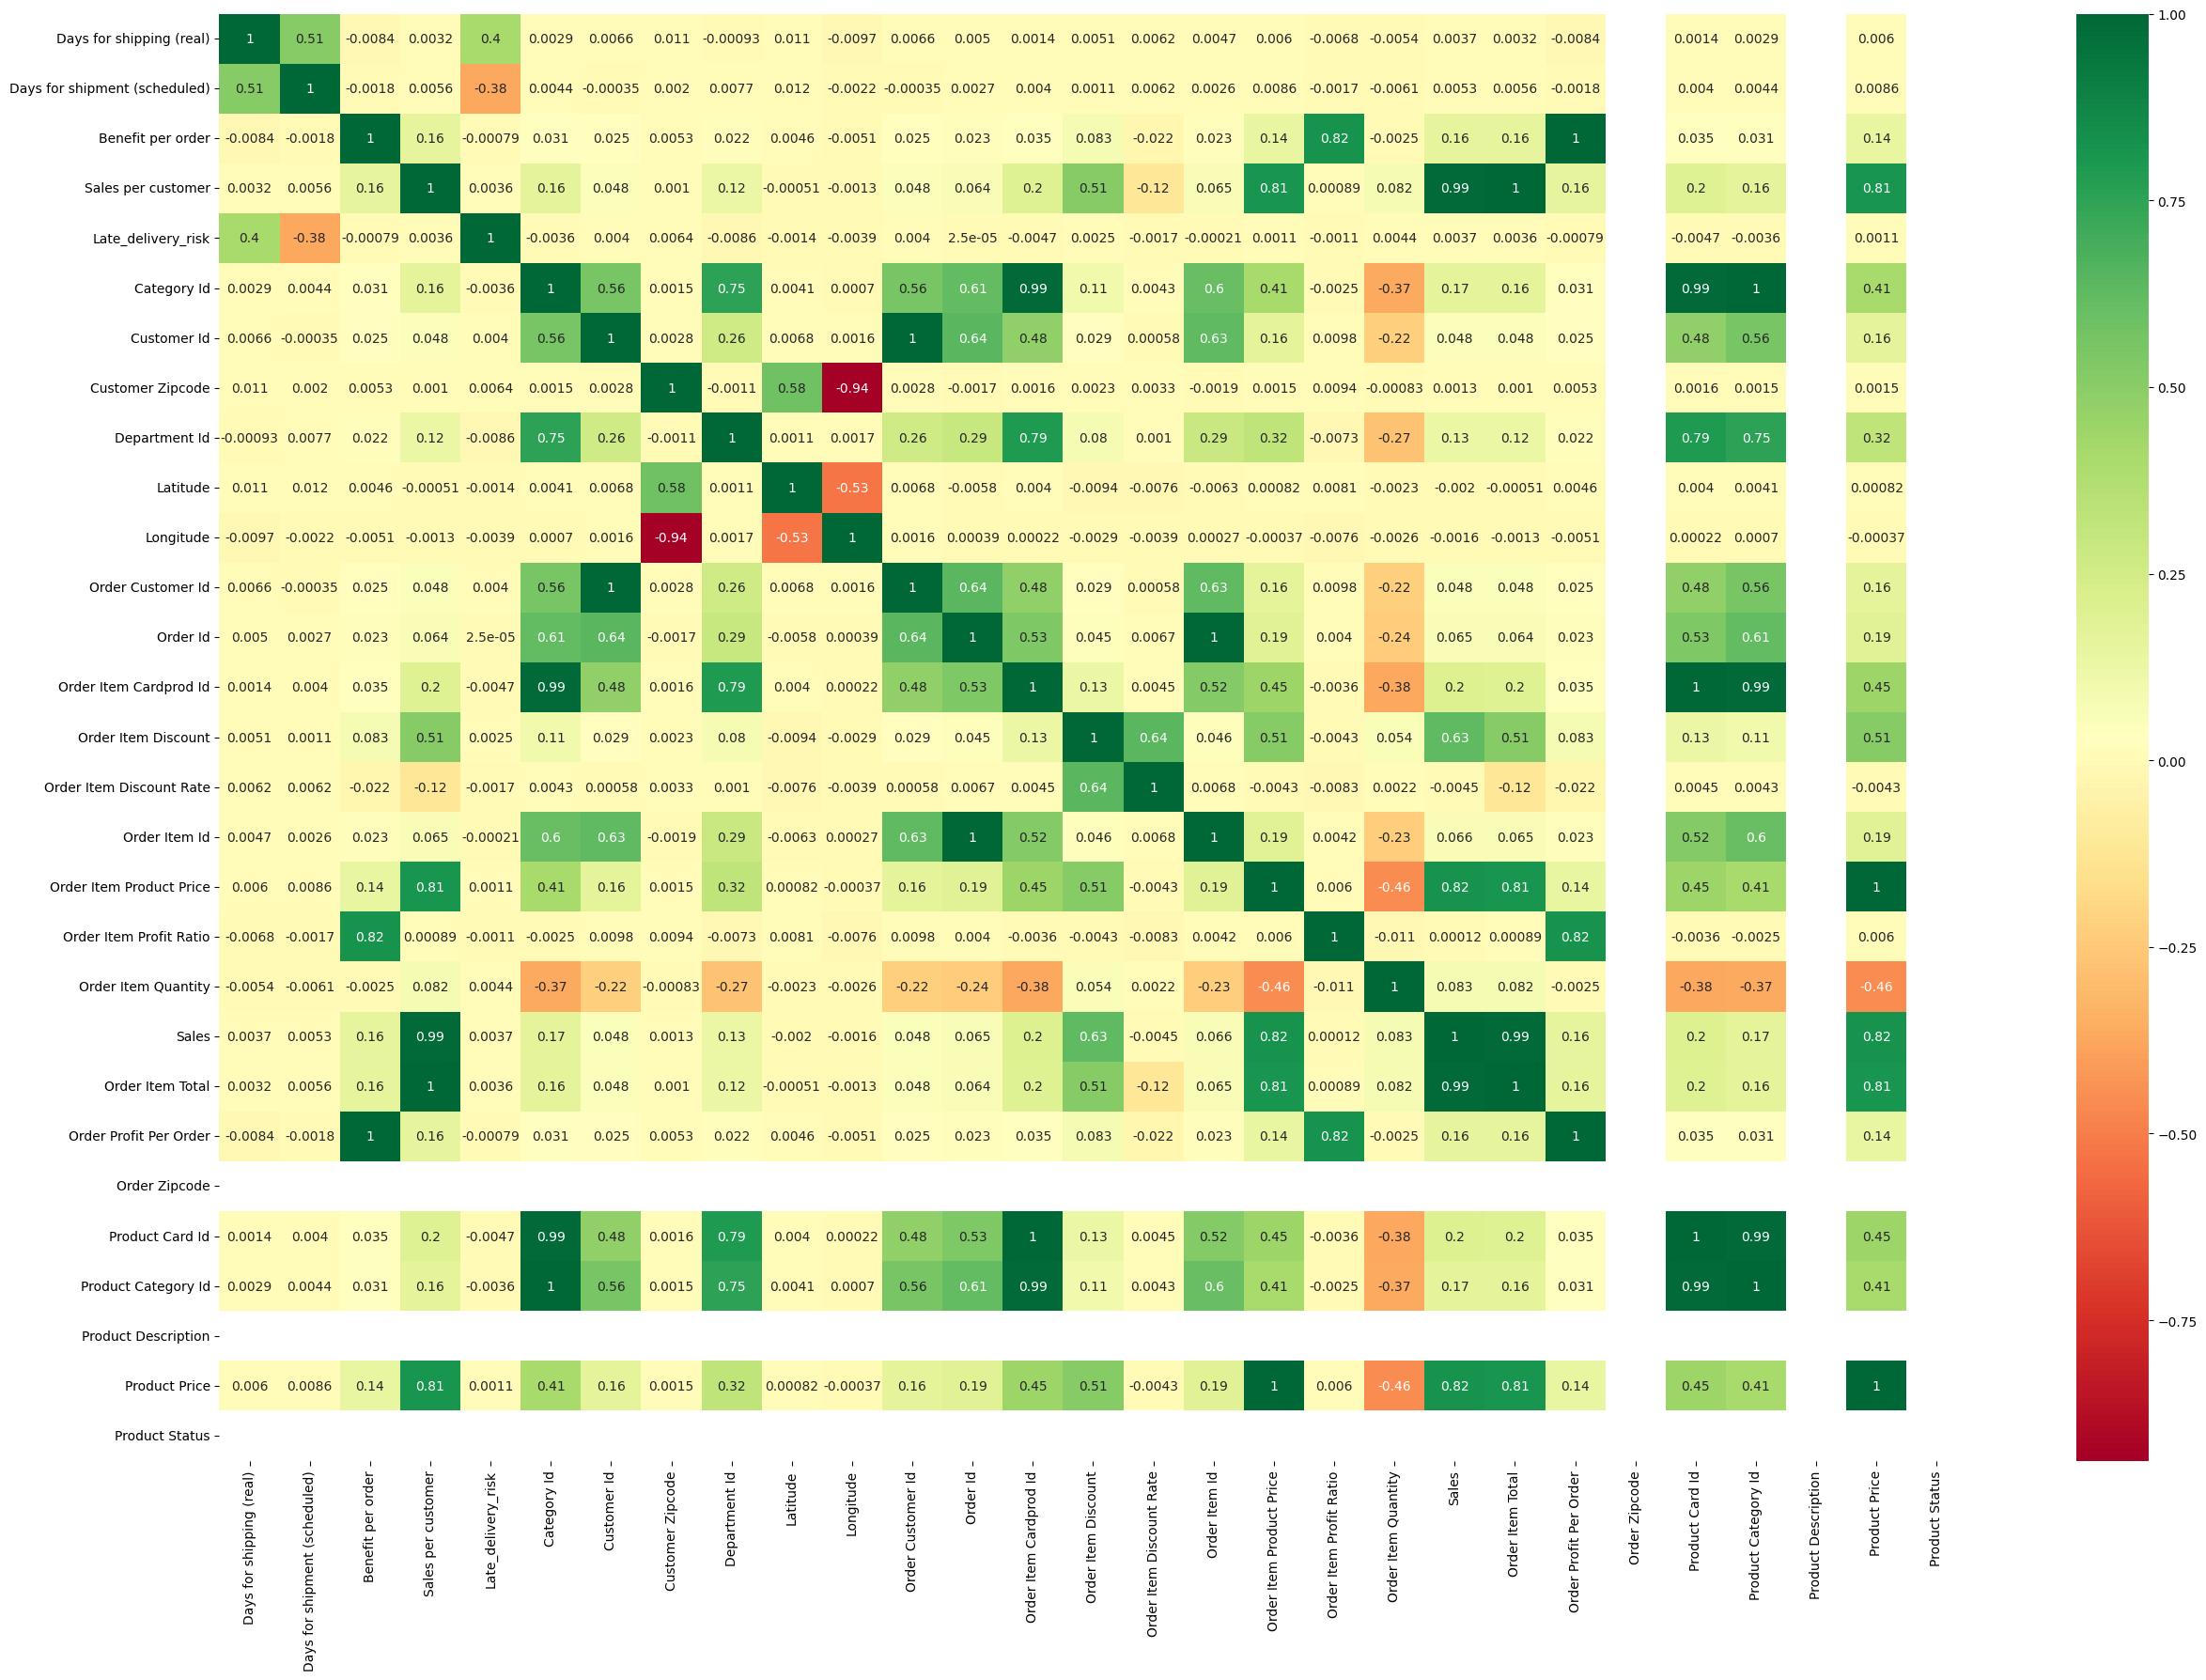

In [ ]:
corrmap = data_asia.corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(data_asia[top].corr(),annot=True,cmap="RdYlGn")

In [ ]:
shipment_features = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Benefit per order',
                        'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status','Order Region',
                        'Order Country','Order City','Market','Delivery Status']
shipment = data_asia[shipment_features]
shipment.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Benefit per order,Sales per customer,Latitude,Longitude,Shipping Mode,Order Status,Order Region,Order Country,Order City,Market,Delivery Status
0,DEBIT,3,4,0,91.250000,314.640015,18.251453,-66.037056,Standard Class,COMPLETE,Southeast Asia,Indonesia,Bekasi,Pacific Asia,Advance shipping
1,TRANSFER,5,4,1,-249.089996,311.359985,18.279451,-66.037064,Standard Class,PENDING,South Asia,India,Bikaner,Pacific Asia,Late delivery
2,CASH,4,4,0,-247.779999,309.720001,37.292233,-121.881279,Standard Class,CLOSED,South Asia,India,Bikaner,Pacific Asia,Shipping on time
3,DEBIT,2,1,1,95.180000,288.420013,18.242538,-66.037056,First Class,COMPLETE,Eastern Asia,China,Guangzhou,Pacific Asia,Late delivery
4,TRANSFER,2,1,1,68.430000,285.140015,25.928869,-80.162872,First Class,PROCESSING,Eastern Asia,China,Guangzhou,Pacific Asia,Late delivery


In [ ]:
finance_features=['Benefit per order','Sales per customer','Order Item Discount','Order Item Discount Rate',
                  'Order Item Product Price','Order Item Profit Ratio']
finance = data_asia[finance_features]
finance.head()

,Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio
0,91.250000,314.640015,13.110000,0.04,327.75,0.29
1,-249.089996,311.359985,16.389999,0.05,327.75,-0.80
2,-247.779999,309.720001,18.030001,0.06,327.75,-0.80
3,95.180000,288.420013,39.330002,0.12,327.75,0.33
4,68.430000,285.140015,42.610001,0.13,327.75,0.24


In [ ]:
# # remove irrelevant fields
# data_asia.drop(columns=['Category Id', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname',
#                  'Customer Password', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id',
#                  'Order Item Cardprod Id', 'Order Item Id', 'Order Zipcode', 'Product Card Id', 'Product Category Id',
#                 'Product Description', 'Product Image', 'Product Status' ], inplace=True)

mengubah format datetime

In [ ]:
#Converting categorical features that represent date and time to datetime datatype.
data_asia['order_date'] = pd.to_datetime(data_asia['order date (DateOrders)'])
data_asia['shipping_date']=pd.to_datetime(data_asia['shipping date (DateOrders)'])

In [ ]:
# Handling Time and date variables
data_asia['order_year'] = pd.DatetimeIndex(data_asia['order_date']).year
data_asia['order_month'] = pd.DatetimeIndex(data_asia['order_date']).month
data_asia['order_day'] = pd.DatetimeIndex(data_asia['order_date']).day
data_asia['shipping_year'] = pd.DatetimeIndex(data_asia['shipping_date']).year
data_asia['shipping_month'] = pd.DatetimeIndex(data_asia['shipping_date']).month
data_asia['shipping_day'] = pd.DatetimeIndex(data_asia['shipping_date']).day

Colom yang akan digunakan

In [ ]:

new_dataset_features = ['Type','Benefit per order', 'Sales per customer',
                        'Category Name', 'Customer City','Customer Country',
                        'Customer Segment', 'Department Name','Order Country',
                        'Order Item Discount', 'Order Item Discount Rate',
                        'Order Item Product Price', 'Order Item Profit Ratio',
                        'Order Item Quantity', 'Sales', 'Order Item Total',
                        'Order Profit Per Order', 'Order Region', 'Order Status',
                        'Product Name', 'Product Price','order_day','order_month','order_year',
                        'shipping_day','shipping_month','shipping_year','Shipping Mode']
len(new_dataset_features)

28

In [ ]:
# new_dataset_features = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Benefit per order',
#                         'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status','Order Region',
#                         'Order Country','Order City','Market','Delivery Status','order_day','order_month','order_year',
#                         'shipping_day','shipping_month','shipping_year']
# len(new_dataset_features)

In [ ]:
new_data = data_asia[new_dataset_features]
model_data = new_data
new_data.head()

,Type,Benefit per order,Sales per customer,Category Name,Customer City,Customer Country,Customer Segment,Department Name,Order Country,Order Item Discount,...,Order Status,Product Name,Product Price,order_day,order_month,order_year,shipping_day,shipping_month,shipping_year,Shipping Mode
0,DEBIT,91.250000,314.640015,Sporting Goods,Caguas,Puerto Rico,Consumer,Fitness,Indonesia,13.110000,...,COMPLETE,Smart watch,327.75,31,1,2018,2,3,2018,Standard Class
1,TRANSFER,-249.089996,311.359985,Sporting Goods,Caguas,Puerto Rico,Consumer,Fitness,India,16.389999,...,PENDING,Smart watch,327.75,13,1,2018,18,1,2018,Standard Class
2,CASH,-247.779999,309.720001,Sporting Goods,San Jose,EE. UU.,Consumer,Fitness,India,18.030001,...,CLOSED,Smart watch,327.75,13,1,2018,17,1,2018,Standard Class
3,DEBIT,95.180000,288.420013,Sporting Goods,Caguas,Puerto Rico,Home Office,Fitness,China,39.330002,...,COMPLETE,Smart watch,327.75,13,1,2018,15,1,2018,First Class
4,TRANSFER,68.430000,285.140015,Sporting Goods,Miami,EE. UU.,Corporate,Fitness,China,42.610001,...,PROCESSING,Smart watch,327.75,13,1,2018,15,1,2018,First Class


In [ ]:
# check for null values
new_data.isna().sum().sum()

0

In [ ]:
new_data.head(5)

,Type,Benefit per order,Sales per customer,Category Name,Customer City,Customer Country,Customer Segment,Department Name,Order Country,Order Item Discount,...,Order Status,Product Name,Product Price,order_day,order_month,order_year,shipping_day,shipping_month,shipping_year,Shipping Mode
0,DEBIT,91.250000,314.640015,Sporting Goods,Caguas,Puerto Rico,Consumer,Fitness,Indonesia,13.110000,...,COMPLETE,Smart watch,327.75,31,1,2018,2,3,2018,Standard Class
1,TRANSFER,-249.089996,311.359985,Sporting Goods,Caguas,Puerto Rico,Consumer,Fitness,India,16.389999,...,PENDING,Smart watch,327.75,13,1,2018,18,1,2018,Standard Class
2,CASH,-247.779999,309.720001,Sporting Goods,San Jose,EE. UU.,Consumer,Fitness,India,18.030001,...,CLOSED,Smart watch,327.75,13,1,2018,17,1,2018,Standard Class
3,DEBIT,95.180000,288.420013,Sporting Goods,Caguas,Puerto Rico,Home Office,Fitness,China,39.330002,...,COMPLETE,Smart watch,327.75,13,1,2018,15,1,2018,First Class
4,TRANSFER,68.430000,285.140015,Sporting Goods,Miami,EE. UU.,Corporate,Fitness,China,42.610001,...,PROCESSING,Smart watch,327.75,13,1,2018,15,1,2018,First Class


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31112 entries, 0 to 31111
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      31112 non-null  object 
 1   Benefit per order         31112 non-null  float64
 2   Sales per customer        31112 non-null  float64
 3   Category Name             31112 non-null  object 
 4   Customer City             31112 non-null  object 
 5   Customer Country          31112 non-null  object 
 6   Customer Segment          31112 non-null  object 
 7   Department Name           31112 non-null  object 
 8   Order Country             31112 non-null  object 
 9   Order Item Discount       31112 non-null  float64
 10  Order Item Discount Rate  31112 non-null  float64
 11  Order Item Product Price  31112 non-null  float64
 12  Order Item Profit Ratio   31112 non-null  float64
 13  Order Item Quantity       31112 non-null  int64  
 14  Sales 

Pengecekan data duplicate

In [ ]:
new_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
31107    False
31108    False
31109    False
31110    False
31111    False
Length: 31112, dtype: bool

In [ ]:
# Menghilangkan data duplikat
new_data = new_data.drop_duplicates(keep='first')
new_data

,Type,Benefit per order,Sales per customer,Category Name,Customer City,Customer Country,Customer Segment,Department Name,Order Country,Order Item Discount,...,Order Status,Product Name,Product Price,order_day,order_month,order_year,shipping_day,shipping_month,shipping_year,Shipping Mode
0,DEBIT,91.250000,314.640015,Sporting Goods,Caguas,Puerto Rico,Consumer,Fitness,Indonesia,13.110000,...,COMPLETE,Smart watch,327.750000,31,1,2018,2,3,2018,Standard Class
1,TRANSFER,-249.089996,311.359985,Sporting Goods,Caguas,Puerto Rico,Consumer,Fitness,India,16.389999,...,PENDING,Smart watch,327.750000,13,1,2018,18,1,2018,Standard Class
2,CASH,-247.779999,309.720001,Sporting Goods,San Jose,EE. UU.,Consumer,Fitness,India,18.030001,...,CLOSED,Smart watch,327.750000,13,1,2018,17,1,2018,Standard Class
3,DEBIT,95.180000,288.420013,Sporting Goods,Caguas,Puerto Rico,Home Office,Fitness,China,39.330002,...,COMPLETE,Smart watch,327.750000,13,1,2018,15,1,2018,First Class
4,TRANSFER,68.430000,285.140015,Sporting Goods,Miami,EE. UU.,Corporate,Fitness,China,42.610001,...,PROCESSING,Smart watch,327.750000,13,1,2018,15,1,2018,First Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31107,DEBIT,86.400002,319.980011,Fishing,Caguas,Puerto Rico,Home Office,Fan Shop,China,80.000000,...,COMPLETE,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,16,1,2016,22,1,2016,Standard Class
31108,PAYMENT,119.989998,299.989990,Fishing,Lancaster,EE. UU.,Home Office,Fan Shop,China,100.000000,...,PENDING_PAYMENT,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,16,1,2016,19,1,2016,Standard Class
31109,CASH,40.000000,399.980011,Fishing,Brooklyn,EE. UU.,Home Office,Fan Shop,China,0.000000,...,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,16,1,2016,20,1,2016,Standard Class
31110,DEBIT,-613.770019,395.980011,Fishing,Bakersfield,EE. UU.,Corporate,Fan Shop,Japón,4.000000,...,COMPLETE,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,16,1,2016,19,1,2016,Second Class


In [ ]:
new_data.to_csv('Supply Chain Management Asia.csv', index=False)